In [1]:
import anndata
import numpy as np
import sys
import torch
sys.path.append('../../../../')
import velovae as vv

In [3]:
dataset = 'IPSC'
root = '/scratch/blaauw_root/blaauw1/gyichen'
adata = anndata.read_h5ad(f'{root}/data/{dataset}_pp.h5ad')

In [ ]:
#vv.preprocess(adata, n_gene=1000, min_shared_counts=20, compute_umap=True)

In [5]:
model_path_base = f'{root}/checkpoints/{dataset}_notime'
figure_path_base = f'{root}/figures/{dataset}_notime'
data_path = f'{root}/data/velovae/continuous/{dataset}_notime'
gene_plot = ['Vim','Nr2f1', 'Krt7', 'H19']

# Informative Time Prior

In [6]:
tprior = adata.obs["day"].to_numpy()
tprior = np.array([float(x) for x in tprior])
adata.obs["tprior"] = tprior

# Train a VeloVAE

In [7]:
figure_path = f'{figure_path_base}/VeloVAE'
model_path = f'{model_path_base}/VeloVAE'

torch.manual_seed(2022)
np.random.seed(2022)
vae = vv.VAE(adata, 
             tmax=20, 
             dim_z=5, 
             device='cuda:0',
             init_method='tprior',
             init_key='tprior',
             tprior=None)

vae.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path, embed='embed')

vae.save_model(model_path, 'encoder', 'decoder')
vae.save_anndata(adata, 'velovae', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 1402 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using prior time.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

Initial induction: 1609, repression: 391/2000
Learning Rate based on Data Sparsity: 0.0003
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 146, test iteration: 290
*********       Stage 1: Early Stop Triggered at epoch 376.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             *********


  0%|          | 0/26682 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.027
Average Set Size: 539
Change in noise variance: 0.9457
*********             Velocity Refinement Round 2             *********
Change in noise variance: 0.0008
Change in x0: 0.1995
*********             Velocity Refinement Round 3             *********
Change in noise variance: 0.0000
Change in x0: 0.1679
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 2097.    *********
Change in noise variance: 0.0000
Change in x0: 0.1489
*********             Velocity Refinement Round 5             *********
Change in noise variance: 0.0000
Change in x0: 0.1328
*********             Velocity Refinement Round 6             *********
*********     Round 6: Early Stop Triggered at epoch 2610.    *********
Change in noise variance: 0.0000
Change in x0: 0.2844
*********             Velocity Refinement Round 7             *********
Stage 2: Early Stop Triggered at round 6.
*********              

# Train a FullVB

In [8]:
figure_path = f'{figure_path_base}/FullVB'
model_path = f'{model_path_base}/FullVB'

torch.manual_seed(2022)
np.random.seed(2022)
full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=5, 
                 device='cuda:0',
                 full_vb=True,
                 init_method='tprior',
                 init_key='tprior',
                 tprior=None)

full_vb.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path, embed='embed')

full_vb.save_model(model_path, 'encoder','decoder')
full_vb.save_anndata(adata, 'fullvb', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 1402 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using prior time.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

Initial induction: 1609, repression: 391/2000
Learning Rate based on Data Sparsity: 0.0003
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 146, test iteration: 290
*********       Stage 1: Early Stop Triggered at epoch 281.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             *********


  0%|          | 0/26682 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.030
Average Set Size: 538
*********     Round 1: Early Stop Triggered at epoch 546.    *********
Change in noise variance: 0.9086
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 658.    *********
Change in noise variance: 0.0013
Change in x0: 0.2152
*********             Velocity Refinement Round 3             *********
Change in noise variance: 0.0003
Change in x0: 0.1840
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 1286.    *********
Change in noise variance: 0.0000
Change in x0: 0.1751
*********             Velocity Refinement Round 5             *********
Stage 2: Early Stop Triggered at round 4.
*********              Finished. Total Time =   0 h : 51 m : 19 s             *********
Final: Train ELBO = 5252.836,	Test ELBO = 5202.939


# Evaluation

In [2]:
dataset = 'IPSC'
root = '/scratch/blaauw_root/blaauw1/gyichen'
adata = anndata.read_h5ad(f'{root}/data/velovae/continuous/{dataset}_notime/{dataset}.h5ad')

        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 1/36 cores)


  0%|          | 0/26682 [00:00<?, ?cells/s]

    finished (0:01:08) --> added 
    'fullvb_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:05) --> added
    'fullvb_velocity_embed', embedded velocity vectors (adata.obsm)


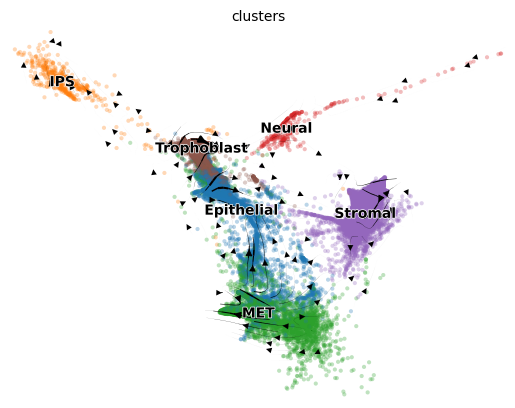

In [9]:
import scvelo as scv
vel_genes = np.load('/scratch/blaauw_root/blaauw1/gyichen/perf/IPSC_scv_vel_genes.npy')
scv.tl.velocity_graph(adata, vkey='fullvb_velocity', basis='embed', gene_subset=adata.var_names[vel_genes])
scv.pl.velocity_embedding_stream(adata, vkey='fullvb_velocity', basis='embed')

['Plet1']
---   Plotting  Results   ---


(None, None)

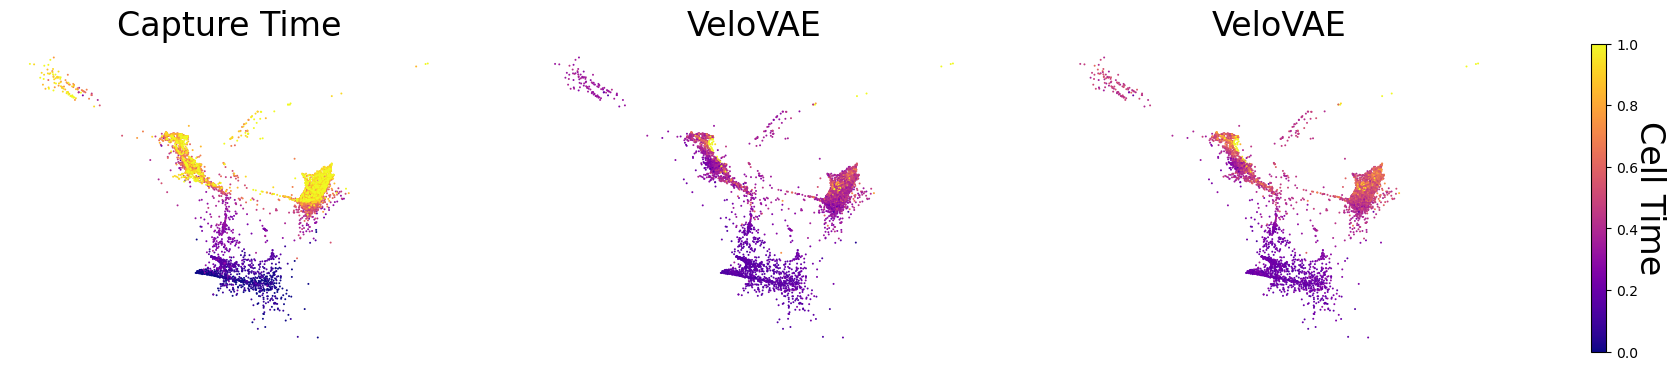

In [10]:
vv.post_analysis(adata,
                 'eval',
                 ['VeloVAE','FullVB'],
                 ['velovae','fullvb'],
                 compute_metrics=False,
                 plot_type=['time'],
                 embed='embed',
                 figure_path=None)